In [67]:
"""
Logistic Regression-
1- Try different thresholds for computing predictions. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall.
2- Do the same analysis for other columns
3- Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding)
4- Plot ROC Curves for each model
"""

'\nLogistic Regression-\n1- Try different thresholds for computing predictions. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall.\n2- Do the same analysis for other columns\n3- Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding)\n4- Plot ROC Curves for each model\n'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
glass = pd.read_csv('glass.csv')

In [3]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass.Type.value_counts().sort_index()

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

In [5]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

household
0    163
1     51
Name: count, dtype: int64

In [6]:
glass.sort_values( by = 'Al', inplace=True)
X = np.array(glass.Al).reshape(-1,1)
y = glass.household

In [7]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[3.11482147]]), array([-6.00880515]))

Text(0, 0.5, 'household')

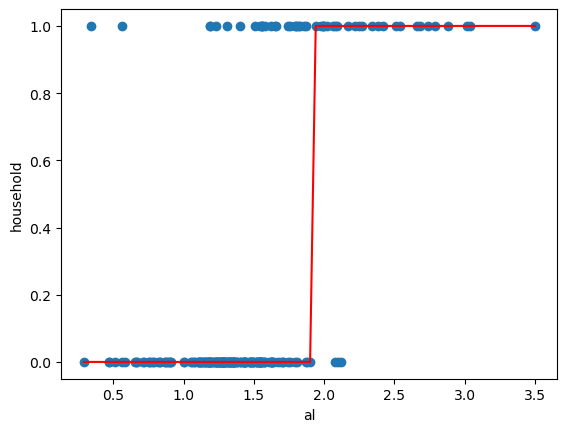

In [8]:
glass.sort_values( by = 'Al', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [9]:
# Store the predicted probabilities of class 1.
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [10]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1,0,0.006027
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,1,0.007035
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010510
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010510
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1,0,0.011888
...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1,0.935929
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1,0.950822
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1,0.967641
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1,0.969535


Text(0, 0.5, 'household')

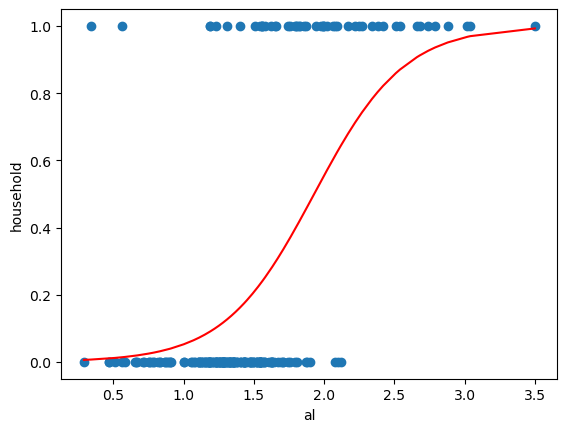

In [11]:
# Plot the predicted probabilities.
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve

In [13]:
accuracy_score(y_true=y, y_pred=pred)

0.8691588785046729

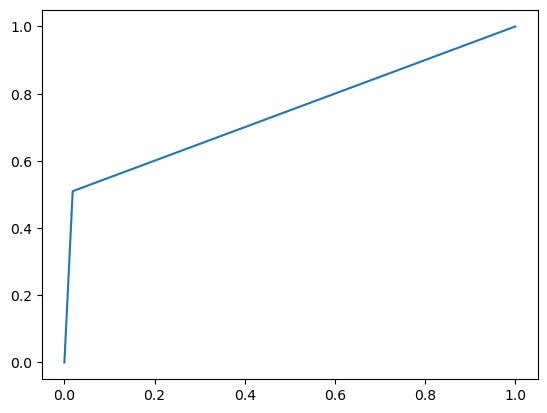

In [14]:
fpr, tpr, thresholds = roc_curve(y, pred)
plt.plot(fpr, tpr,  label = 'Threshold = 0.5')

Checking for a range of values of threshold:

In [15]:
# Threshold is 0.25
y_pred_1 = (glass.household_pred_prob >= 0.25).astype(int)

Text(0, 0.5, 'household')

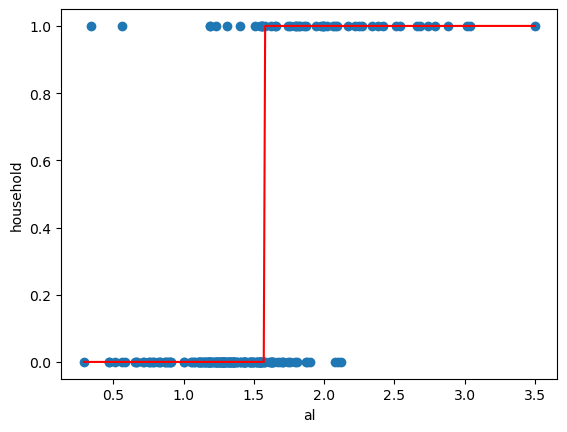

In [16]:
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, y_pred_1, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [17]:
accuracy_score(y_true=y, y_pred=y_pred_1)

0.8411214953271028

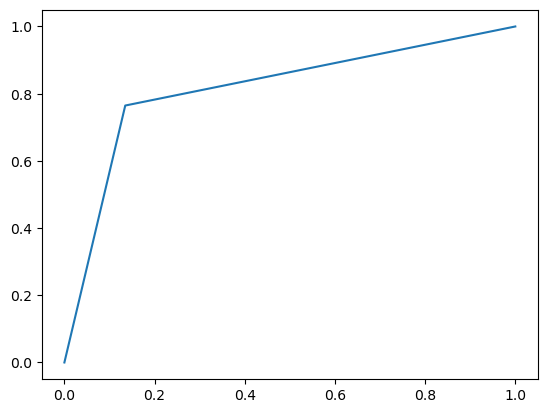

In [18]:
fpr, tpr, thresholds = roc_curve(y, y_pred_1)
plt.plot(fpr, tpr,  label = 'Threshold = 0.25')

We get worse accuracy then previous case...

In [19]:
# Threshold is 0.6
y_pred_2 = (glass.household_pred_prob >= 0.6).astype(int)

Text(0, 0.5, 'household')

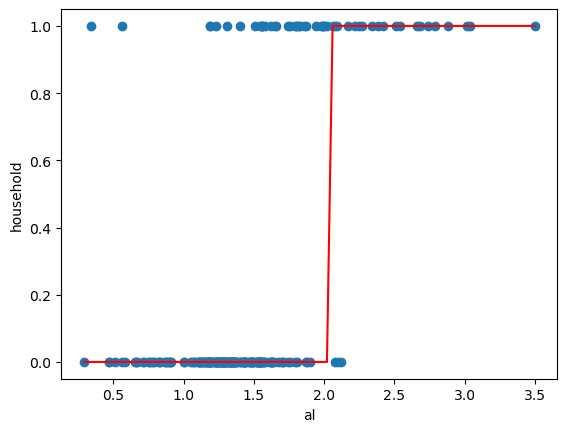

In [20]:
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, y_pred_2, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [21]:
accuracy_score(y_true=y, y_pred=y_pred_2)

0.8411214953271028

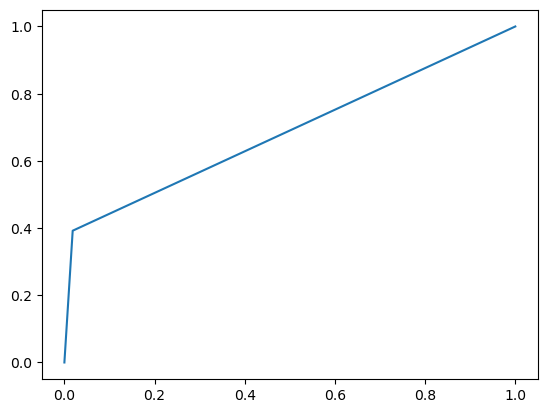

In [22]:
fpr, tpr, thresholds = roc_curve(y, y_pred_2)
plt.plot(fpr, tpr,  label = 'Threshold = 0.6')

We get bad accuracy here as well...

In [23]:
# Running for a ragne of values between 0.25 to 0.6 to get an optimum value

In [24]:
thresholds = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
accuracies = []

for threshold in thresholds:
    prediction = (glass.household_pred_prob >= threshold).astype(int)
    accuracy = accuracy_score(y_true=y, y_pred=prediction)
    accuracies.append(accuracy)

Text(0, 0.5, 'Accuracy')

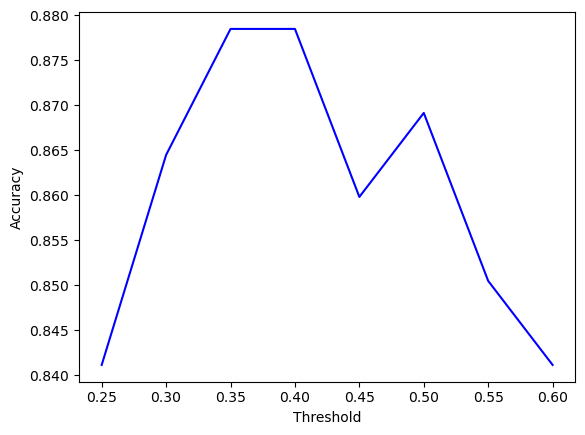

In [25]:
plt.plot(thresholds, accuracies, color='blue')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')

In [26]:
max(accuracies)

0.8785046728971962

We get max accuracy at threshold 0.35

In [27]:
y_pred_3 = (glass.household_pred_prob >= 0.35).astype(int)

Text(0, 0.5, 'household')

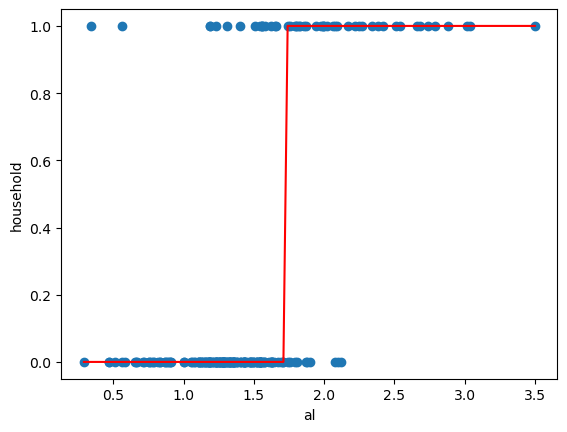

In [28]:
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, y_pred_3, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [29]:
accuracy_score(y_true=y, y_pred=y_pred_3)

0.8785046728971962

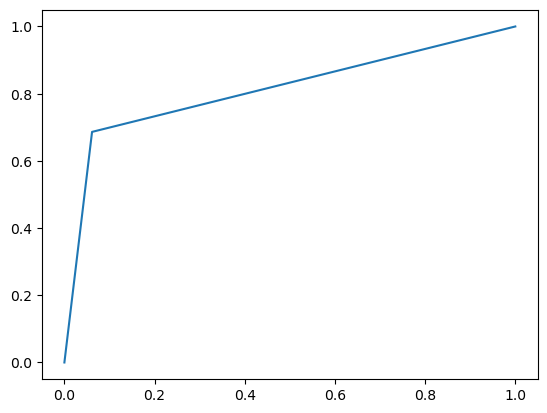

In [30]:
fpr, tpr, thresholds = roc_curve(y, y_pred_3)
plt.plot(fpr, tpr,  label = 'Threshold = 0.35')

In [31]:
precision_score(y_true=y, y_pred=y_pred_3)

0.7777777777777778

In [32]:
recall_score(y,y_pred_3)

0.6862745098039216

Text(0, 0.5, 'household')

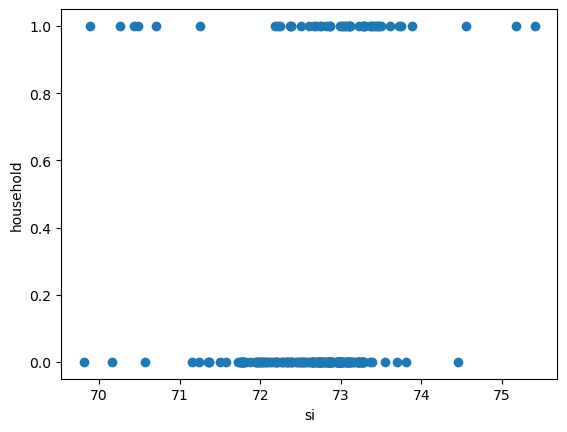

In [33]:
glass.sort_values( by = 'Si', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Si, glass.household)
plt.xlabel('si')
plt.ylabel('household')

Text(0, 0.5, 'household')

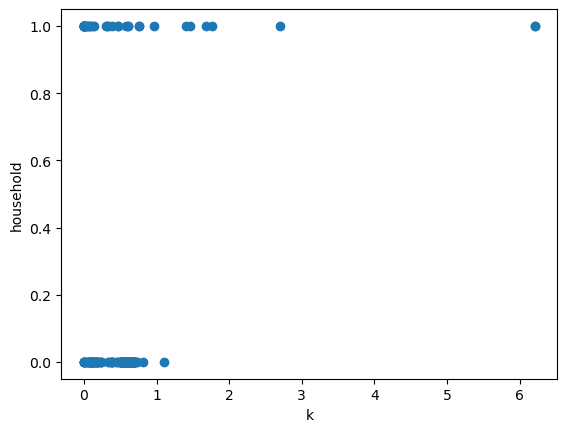

In [34]:
glass.sort_values( by = 'K', inplace=True)
# Plot the class predictions.

plt.scatter(glass.K, glass.household)
plt.xlabel('k')
plt.ylabel('household')

Text(0, 0.5, 'household')

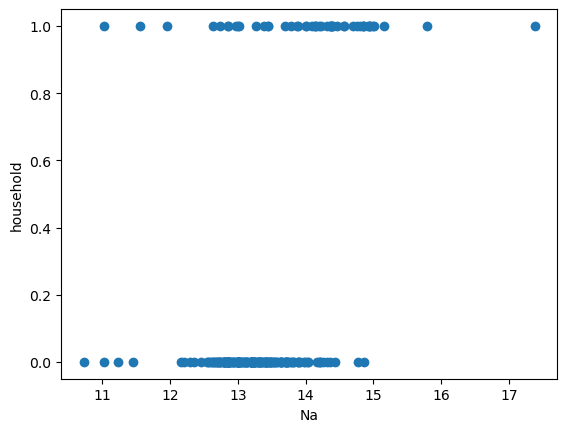

In [35]:
glass.sort_values( by = 'Na', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Na, glass.household)
plt.xlabel('Na')
plt.ylabel('household')

Text(0, 0.5, 'household')

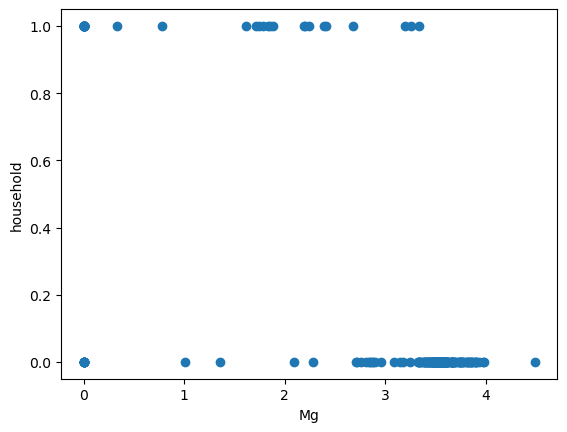

In [36]:
glass.sort_values( by = 'Mg', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Mg, glass.household)
plt.xlabel('Mg')
plt.ylabel('household')

Text(0, 0.5, 'household')

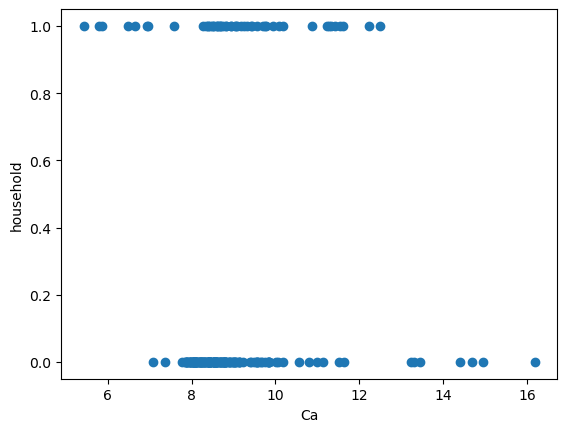

In [37]:
glass.sort_values( by = 'Ca', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Ca, glass.household)
plt.xlabel('Ca')
plt.ylabel('household')

Text(0, 0.5, 'household')

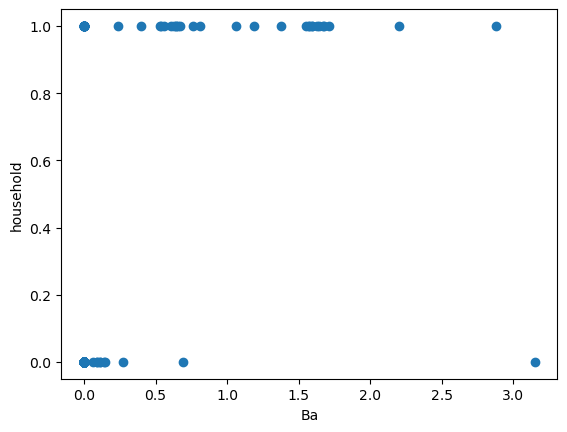

In [38]:
glass.sort_values( by = 'Ba', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Ba, glass.household)
plt.xlabel('Ba')
plt.ylabel('household')

Text(0, 0.5, 'household')

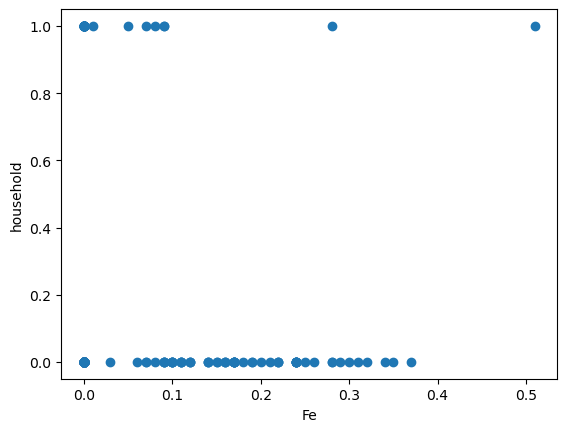

In [39]:
glass.sort_values( by = 'Fe', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Fe, glass.household)
plt.xlabel('Fe')
plt.ylabel('household')

Text(0, 0.5, 'household')

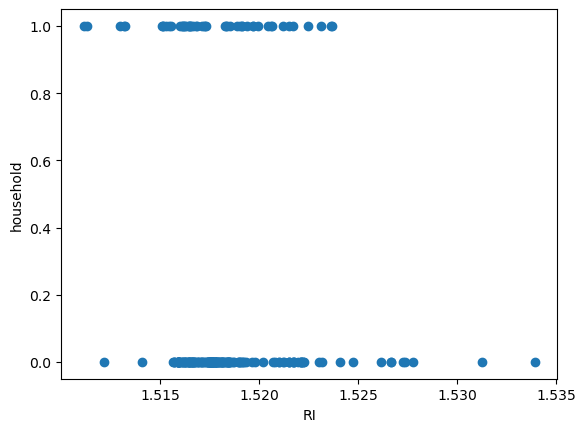

In [40]:
glass.sort_values( by = 'RI', inplace=True)
# Plot the class predictions.

plt.scatter(glass.RI, glass.household)
plt.xlabel('RI')
plt.ylabel('household')

Running the logistic regression on all features...

In [41]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household,household_pred_prob
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,1,0.007035
185,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00,7,1,0.408305
56,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31,1,0,0.074454
180,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.00,0.00,6,1,0.229351
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1,0.969535


In [42]:
columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [43]:
X = glass[columns].to_numpy()

In [44]:
y = glass.household

In [45]:
logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

c:\Users\rushx\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([[-0.02339712,  0.46665923, -1.95747581,  1.57585684,  0.02238716,
         -0.19804569, -0.73388211,  0.08070945, -0.55183696]]),
 array([-0.03994099]))

In [46]:
accuracy_score(y_true=y, y_pred=pred)

0.9345794392523364

In [47]:
precision_score(y_true=y, y_pred=pred)

0.8775510204081632

In [48]:
recall_score(y,pred)

0.8431372549019608

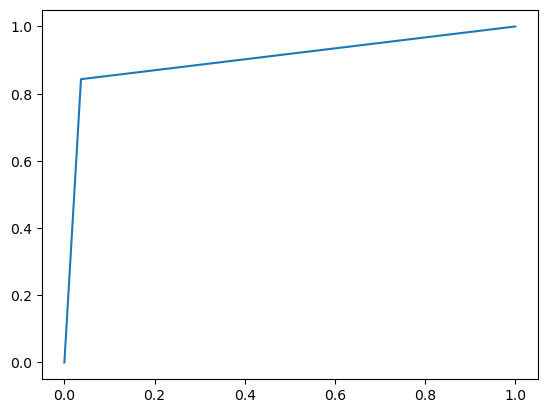

In [49]:
fpr, tpr, thresholds = roc_curve(y, pred)
plt.plot(fpr, tpr)

In [50]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, pred)

0.9031637194755203

## Clustering

### Question 1

Repeat the above exercise for different values of k

 - How do the inertia and silhouette scores change?

 - What if you don't scale your features?

 - Is there a 'right' k? Why or why not?


In [56]:
# Check out the dataset and our target values
df = pd.read_csv("iris.csv")
print(df['Name'].value_counts())
df.head(5)

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
cols = df.columns[:-1]
sns.pairplot(df[cols])

In [58]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

In [59]:
pd.DataFrame(X_scaled, columns=cols).describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [60]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

c:\Users\rushx\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [61]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [62]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.5043188549150884

In [63]:
df['label'] = labels
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [64]:
cols = df.columns[:-2]
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='label')

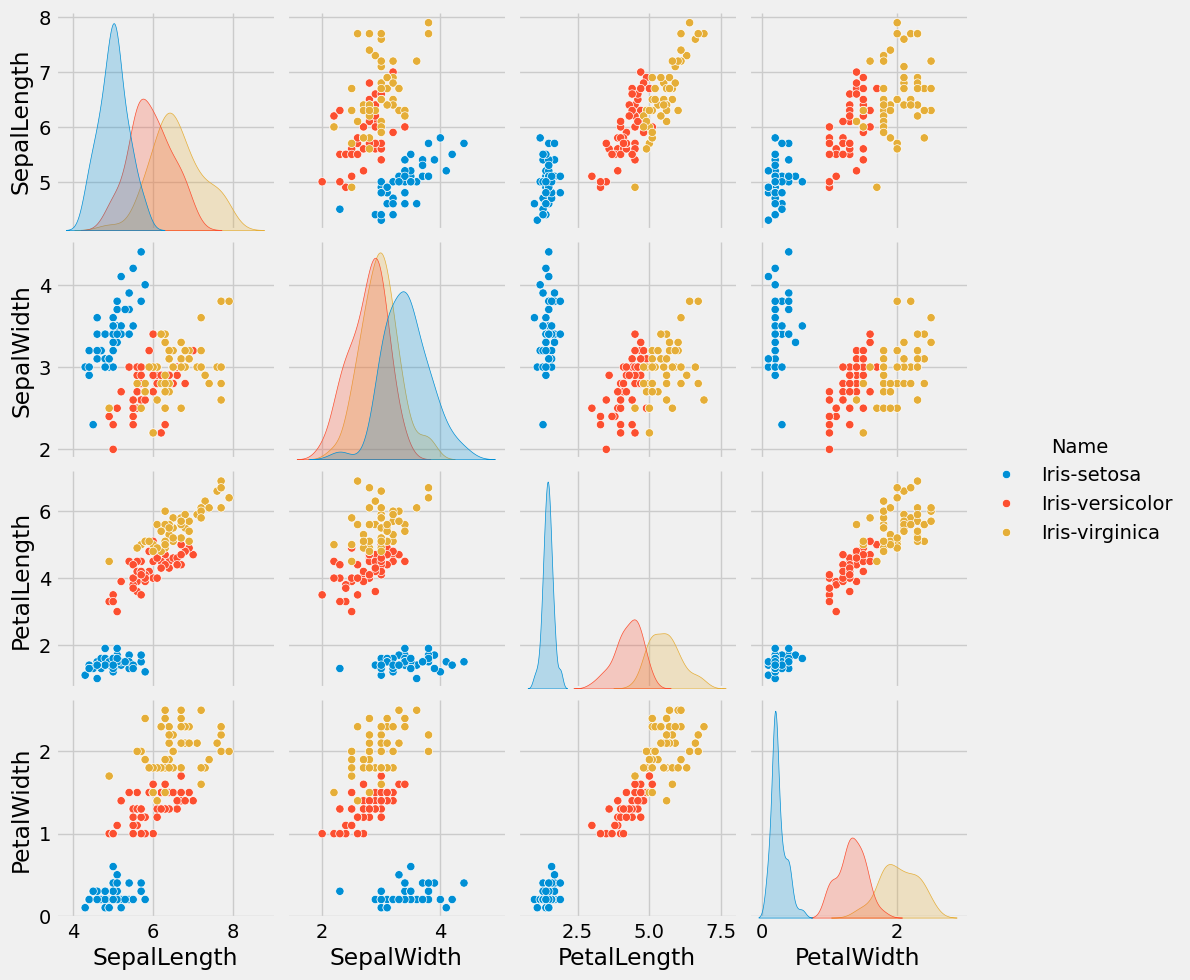

In [80]:
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='Name')